### Playing with DLC Live

In [1]:
import sys
sys.path.append('../scripts/')
from dataLoader import DLCInterface 
import numpy as np
%load_ext autoreload
%autoreload 2

2024-07-15 12:47:01.032344: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-15 12:47:01.089218: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-15 12:47:01.105693: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-15 12:47:01.373749: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: li

Loading DLC 2.3.10...


/home/jakejoseph/anaconda3/envs/DEEPLABCUT_LIVE/lib/python3.9/site-packages/_distutils_hack/__init__.py:26: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [2]:
model = DLCInterface('/home/jakejoseph/Desktop/Joseph_Code/FESFatigue-Jake-2024-05-31/config.yaml')
model.benchmark('/home/jakejoseph/Desktop/Joseph_Code/FESFatigue-Jake-2024-05-31/videos/napierecrbfatigue_05_31_3_1.mp4',
                '/home/jakejoseph/Desktop/Joseph_Code/FESFatigue-Jake-2024-05-31/exported-models/DLC_FESFatigue_resnet_50_iteration-2_shuffle-1')

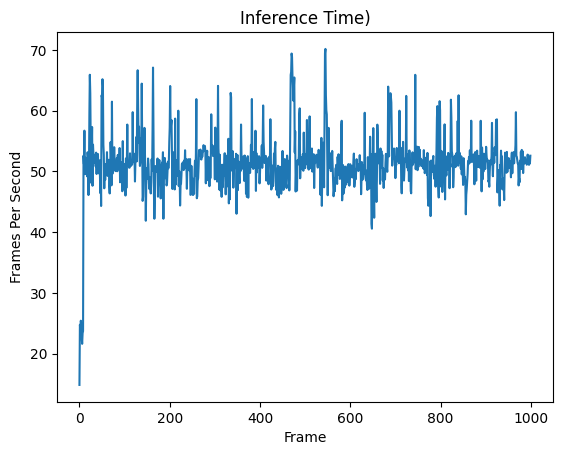

Final accumulated lag: -3.0688 seconds


In [7]:
model.plotInferenceTime('/home/jakejoseph/Desktop/Joseph_Code/stim_behavior/benchmark_results/benchmark_eros_GPU_0.pickle')
lag =  np.cumsum((1/60) -model.inferenceTimes)
print(f"Final accumulated lag: {lag[-1]:.4f} seconds")

### Extracting frame from selected videl

In [8]:
import cv2

def extract_frame(video_path, frame_number):
    # Open the video file
    cap = cv2.VideoCapture(video_path)
    
    # Check if video opened successfully
    if not cap.isOpened():
        print("Error opening video file")
        return None
    
    # Set the frame position
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
    
    # Read the frame
    ret, frame = cap.read()
    
    # Check if frame was successfully read
    if not ret:
        print(f"Error reading frame {frame_number}")
        return None
    
    # Release the video capture object
    cap.release()
    
    # Return the frame as a NumPy array
    return frame

# Example usage
video_path = '/home/jakejoseph/Desktop/Joseph_Code/FESFatigue-Jake-2024-05-31/videos/napierecrbfatigue_05_31_3_1.mp4'
frame_number = 100  # The frame you want to extract

frame = extract_frame(video_path, frame_number)

if frame is not None:
    print(f"Frame shape: {frame.shape}")
    print(f"Frame data type: {frame.dtype}")
    

Frame shape: (1536, 2048, 3)
Frame data type: uint8


In [9]:
from dlclive import DLCLive
dlc_live = DLCLive('/home/jakejoseph/Desktop/Joseph_Code/FESFatigue-Jake-2024-05-31/exported-models/DLC_FESFatigue_resnet_50_iteration-2_shuffle-1')
dlc_live.init_inference(frame)
prediction = dlc_live.get_pose(frame)

2024-07-15 12:49:20.066045: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-07-15 12:49:20.082272: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-07-15 12:49:20.083905: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-07-15 12:49:20.085838: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compi

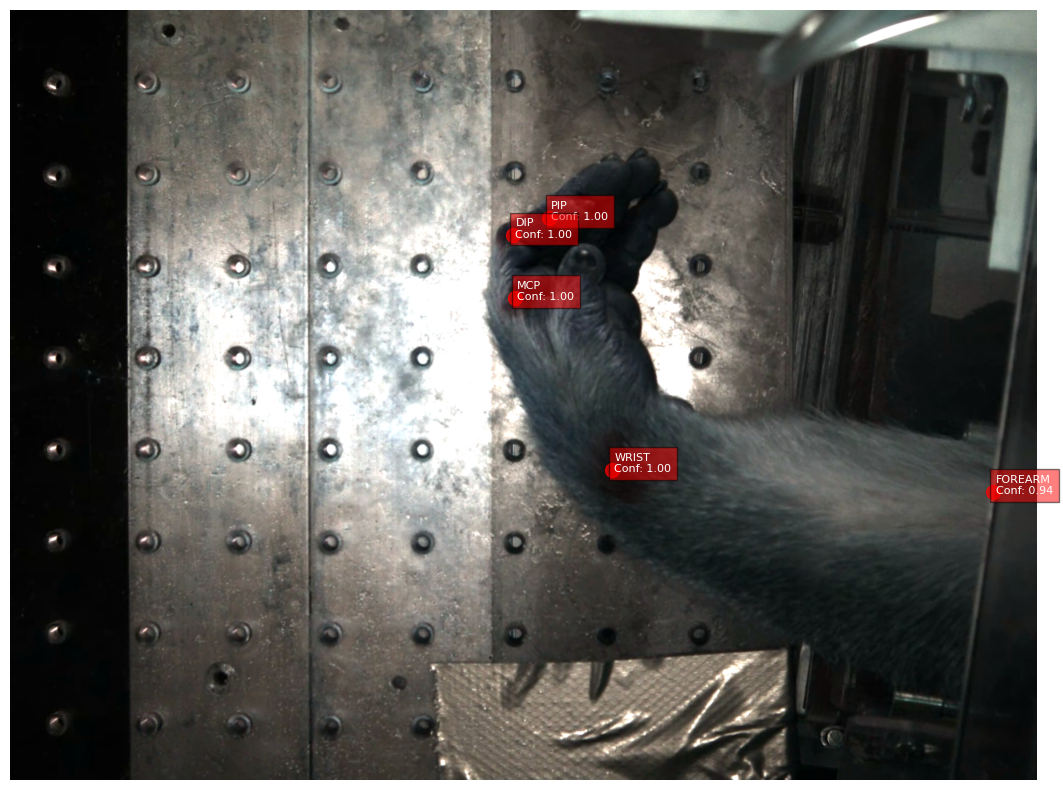

In [11]:
from matplotlib import pyplot as plt
def plot_keypoints(image_array, keypoints):
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(12, 8))

    # Display the image
    ax.imshow(image_array)

    joints = ['PIP','DIP','MCP','WRIST','FOREARM']

    # Plot each keypoint
    for i, (x, y, conf) in enumerate(keypoints):
        ax.plot(x, y, 'ro', markersize=10, alpha=0.7)
        ax.text(x+5, y+5, f'{joints[i]}\nConf: {conf:.2f}', color='white', fontsize=8,
                bbox=dict(facecolor='red', alpha=0.5))

    # Set the title and remove axis ticks
    ax.set_axis_off()

    # Show the plot
    plt.tight_layout()
    plt.show()

plot_keypoints(frame, prediction)